In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
from autoplan.token import PyretTokenizer
from scripts.rainfall_ingest import ingest_dataset
import json
from pprint import pprint
from autoplan.neighbors import NNClassifier
import numpy as np

In [4]:
dataset_name = 'T1Acc'
dataset = ingest_dataset(dataset_name)

Skipped 2 programs


In [5]:
dataset.dataset[1]['source']

'fun rainfall(nums :: List<Number>) -> Number:\n  fun rainfall-helper(l-of-nums :: List<Number>, curr-count :: Number, curr-sum :: Number) -> Number:\n    cases(List) l-of-nums:\n      | empty  =>  if (curr-count  ==  0): 0 else: (curr-sum  /  curr-count) end\n      | link(f,r)  => \n        if (f  ==  -999):\n          if (curr-count  ==  0): 0 else: (curr-sum  /  curr-count) end\n        else if (f >= 0):\n          rainfall-helper(r,curr-count  +  1, curr-sum  +  f)\n        else:\n          rainfall-helper(r,curr-count, curr-sum)\n        end\n    end\n  end\n  rainfall-helper(nums,0,0)\n  end\n\n#This took 7 minutes. I realize this has no significance and I am anonymous so this is an accurate number.\n\n\n'

In [6]:
nn = NNClassifier(dataset, PyretTokenizer())

0.717948717948718


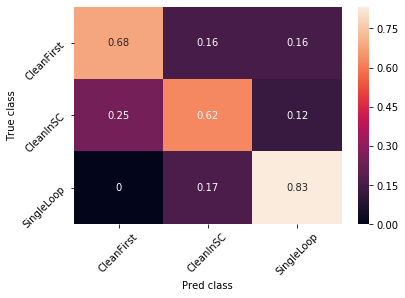

In [45]:
evl = nn.eval()
print(evl.accuracy)
evl.plot_cm('')

In [46]:
evals = nn.crossval(k=30, val_frac=0.33)
np.mean([evl.accuracy for evl in evals])

0.7256410256410258

In [53]:
def tree_size(t):
    return 1 + sum([tree_size(k) for k in t.children])

In [52]:
nn.trees[0].children

[<zss.simple_tree.Node object at 0x7f846a670518 program>,
 <zss.simple_tree.Node object at 0x7f846a670550 prelude>,
 <zss.simple_tree.Node object at 0x7f846a670588 block>]

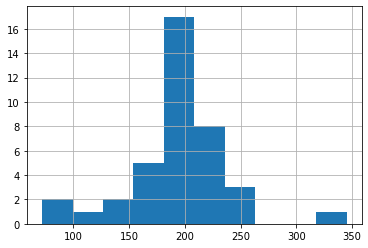

In [56]:
import pandas as pd
pd.Series([tree_size(t) for t in nn.trees]).hist()